In [179]:
import networkx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json 
tweets_collection = r'C:\Users\user\Downloads\geotagged_tweets_20160812-0912.jsons'
tweets_file = open(tweets_collection, "r")
tweets_data=[]
numbers={}
pos={}
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [182]:
for idx, line in enumerate(tweets_file):
    try:
        tweet = json.loads(line)
        if (tweet['place']['country_code']=='US') & (tweet['place']['place_type']=='city'):
            aver(tweet['place']['full_name'])
        if (tweet['place']['country_code']=='US') & (tweet['place']['place_type']=='admin'):
            change(tweet['place']['full_name'])
    except Exception as e:
        continue
    if idx%50000==0:
        print(idx)
        

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000


In [180]:
def aver(cityname):
    code=cityname[-2:]
    if code in numbers.keys():        
        numbers[code]=numbers[code]+1
    else:
        numbers[code]=1

In [181]:
def change(adminname):
    code=adminname[:-5]
    code=code.replace(code,us_state_abbrev[code])
    if code in numbers.keys():        
        numbers[code]=numbers[code]+1
    else:
        numbers[code]=1

In [183]:
data = pd.read_csv(r'C:\Users\user\Desktop\UVA\Fundamentals\pop.txt',sep='    ',names=['population'],header = None,engine='python',index_col=0)
data

,population
AL,"4,779,736"
AK,"710,231"
AZ,"6,392,017"
AR,"2,915,918"
CA,"37,253,956"
CO,"5,029,196"
CT,"3,574,097"
DE,"897,934"
DC,"601,723"
FL,"18,801,310"


In [193]:
for w in data.index:
    if w!='US':
        pos[w]=round(numbers[w]/data.loc[w,'population']*1000,2)

In [185]:
for w in data.index:
    data.loc[w,'population']=data.loc[w,'population'].replace(' ','')
    data.loc[w,'population']=int(data.loc[w,'population'].replace(',',''))


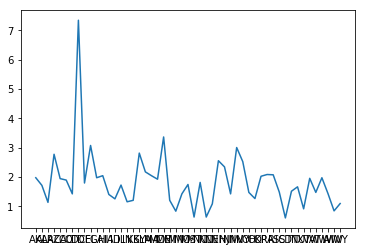

In [201]:
lists = sorted(pos.items()) 

x, y = zip(*lists) 

plt.plot(x, y)
plt.show()

In [230]:
print('max: ' +str(max(zip(pos.values(),pos.keys()))) + '\nmin: '+
str(min(zip(pos.values(),pos.keys()))))

max: (7.34, 'DC')
min: (0.6, 'SD')
